In [28]:
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
import glob
import pandas as pd
import csv

In [19]:
def import_data(data_path):
    # Import Data
    df = pd.read_hdf(data_path)
    data = df[df.keys().levels[0][0]].values 
    return data
def Rotate(data, angle):
    return np.einsum('ijk,jk ->ik', np.array([[np.cos(angle), -1*np.sin(angle)],
                                             [np.sin(angle), np.cos(angle)]]), data)
def rot_trans_data(data_df):
    # FORMATING DATA
    time_length = len(data_df) # t
    data = np.swapaxes(data_df.reshape((time_length,30,3)).T,0,1) # 30 x 3 x t
    # MAKE POINT 2 ORIGIN
    data[:,0:2,:] = data[:,0:2,:] - data[2,0:2,:]
    # COMPUTE THE CENTER OF AXIS & ANGLE
    axis_vector = data[1,:,:]
    axis_angle_deviation = np.sign(axis_vector[0,:])*np.pi/2-np.arctan(axis_vector[1,:]/axis_vector[0,:])
    return axis_angle_deviation

In [46]:
data_pathnames = glob.glob('data/*.h5')
data = import_data(data_pathnames[0])
angles = rot_trans_data(data)
processed_data = np.array([np.arange(0,len(data)), angles])

# CREATE CSV
with open(data_pathnames[0]+'.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['Frame', 'Angle (rad)'])
    for i in range(processed_data.shape[-1]):
        filewriter.writerow([processed_data[0,i], processed_data[1,i]])

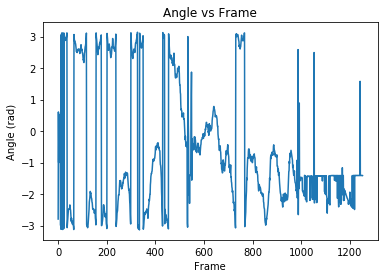

In [44]:
plt.plot(processed_data[0,:], processed_data[1,:])
plt.xlabel("Frame")
plt.ylabel("Angle (rad)")
plt.title("Angle vs Frame")
plt.show()